In [2]:
!pip install 'scipy>=1.8'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 19.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [3]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Fonctions

In [3]:
import numpy as np
import networkx as nx

def calculate_spring_matrix(masses, spring_constants):
    # Create the graph
    G = nx.Graph()

    # Add nodes with names and values
    for i, m in enumerate(masses):
        node_name = chr(ord('A') + i)
        G.add_node(node_name, value=m)

    # Add edges with different values
    for n1, n2, k in spring_constants:
        G.add_edge(n1, n2, value=k)
        G.add_edge(n2, n1, value=k)

    # Create a dictionary to map node labels to indices in the matrix
    node_map = {n: i for i, n in enumerate(G.nodes())}

    # Create the adjacency matrix with zeros
    adj_matrix = np.zeros((len(G), len(G)))

    # Fill in the adjacency matrix with the spring constants
    for n1, n2, d in G.edges(data=True):
        i = node_map[n1]
        j = node_map[n2]
        adj_matrix[i][j] = d['value']
        adj_matrix[j][i] = d['value']

    return adj_matrix, G


In [4]:
import numpy as np

# Fonction pour obtenir la matrice d'équation du mouvemement à partir du graphe
def compute_A(adj_matrix, masses, spring_constants):
    n = len(adj_matrix)  # Number of nodes
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if adj_matrix[i,j] != 0:  # If nodes i and j are connected
                A[i,i] += spring_constants[i,j]
                A[i,j] = -spring_constants[i,j]
    for i in range(n):
        A[i,i] += np.sum(spring_constants[i,:] + spring_constants[:,i])
    return A

In [5]:
import numpy as np

# Fonction pour obtenir la position à l'équilibre
def find_equilibrium(adj_matrix, masses, spring_constants, gravity=0):
    n = len(adj_matrix)  # Number of nodes
    A = compute_A(adj_matrix, masses, spring_constants)
    b = np.zeros(n)
    x = np.zeros(n)  # Define x to be an array of zeros
    for i in range(n):
        for j in range(n):
            if adj_matrix[i,j] != 0:  # If nodes i and j are connected
                b[i] -= spring_constants[i,j] * (0 - x[j])
        b[i] -= masses[i] * gravity
    x = np.linalg.solve(A, b)
    return x

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(adj_matrix, node_names, masses, spring_constants):
    # Create a graph object from the adjacency matrix
    G = nx.from_numpy_array(adj_matrix)

    # Set the node attributes to the masses, degree, and name
    node_masses = {i: m for i, m in enumerate(masses)}
    node_degrees = {i: np.sum(adj_matrix[i,:]) for i in range(len(adj_matrix))}
    node_names_dict = {i: node_names[i] for i in range(len(node_names))}
    nx.set_node_attributes(G, node_masses, 'mass')
    nx.set_node_attributes(G, node_degrees, 'degree')
    nx.set_node_attributes(G, node_names_dict, 'name')

    # Set the edge attributes to the spring constants
    edge_spring_constants = {}
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if adj_matrix[i,j] == 1:
                edge_spring_constants[(i,j)] = spring_constants[i,j]
    nx.set_edge_attributes(G, edge_spring_constants, 'spring_constant')

    # Compute the node sizes as a function of the node degrees
    node_sizes = [1000 * node_degrees[i] for i in range(len(adj_matrix))]

    # Draw the graph with node masses, names, and spring constants as labels
    pos = nx.spring_layout(G)
    node_labels = {i: node_names[i] for i in range(len(node_names))}
    edge_labels = {(i,j): 'k={}'.format(k) for (i,j), k in edge_spring_constants.items()}
    nx.draw(G, pos, node_size=node_sizes, labels=node_labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.show()


In [7]:
def calculate_frequencies(A):
    # Compute the eigenvalues of A
    eigenvalues = np.linalg.eigvals(A)

    # Compute the frequencies of the normal modes
    frequencies = np.sqrt(np.abs(eigenvalues))

    # Sort the frequencies in ascending order
    frequencies = np.sort(frequencies)
    
    return frequencies

In [8]:
#------PERFORM QUICK ALGEBRAIC ANALYSIS------#
import numpy as np
def analyze_matrix(matrix):
    # Convert the matrix to a NumPy array
    arr = np.array(matrix)

    # Calculate the transpose of the matrix
    transpose = arr.T

    # Calculate the determinant of the matrix
    determinant = np.linalg.det(arr)

    # Calculate the inverse of the matrix
    try:
        inverse = np.linalg.inv(arr)
    except np.linalg.LinAlgError:
        inverse = None

    # Calculate the eigenvalues and eigenvectors of the matrix
    eigenvalues, eigenvectors = np.linalg.eig(arr)

    # Create a dictionary to store the results
    results = {
        'transpose': transpose.tolist(),
        'determinant': determinant,
        'inverse': inverse.tolist() if inverse is not None else None,
        'eigenvalues': eigenvalues.tolist(),
        'eigenvectors': eigenvectors.tolist()
    }
    print(f"Transpose:\n{results['transpose']}")
    print(f"Determinant: {results['determinant']}")
    print(f"Inverse:\n{results['inverse']}")
    print(f"Eigenvalues: {results['eigenvalues']}")
    print(f"Eigenvectors:\n{results['eigenvectors']}")
    return results

In [9]:
#------PERFORM QUICK GRAPH ANALYSIS------#

import networkx as nx
def analyze_graph(graph):
    # Get the number of nodes in the graph
    num_nodes = graph.number_of_nodes()

    # Get the number of edges in the graph
    num_edges = graph.number_of_edges()

    # Get the degree centrality of each node
    degree_centrality = nx.degree_centrality(graph)

    # Get the betweenness centrality of each node
    betweenness_centrality = nx.betweenness_centrality(graph)

    # Get the eigenvector centrality of each node
    eigenvector_centrality = nx.eigenvector_centrality(graph)

    # Get the clustering coefficient of each node
    clustering_coefficient = nx.clustering(graph)

    # Create a dictionary to store the results
    results = {
        'num_nodes': num_nodes,
        'num_edges': num_edges,
        'degree_centrality': degree_centrality,
        'betweenness_centrality': betweenness_centrality,
        'eigenvector_centrality': eigenvector_centrality,
        'clustering_coefficient': clustering_coefficient
    }

    print(f"Number of nodes: {results['num_nodes']}")
    print(f"Number of edges: {results['num_edges']}")
    print(f"Degree centrality: {results['degree_centrality']}")
    print(f"Betweenness centrality: {results['betweenness_centrality']}")
    print(f"Eigenvector centrality: {results['eigenvector_centrality']}")
    print(f"Clustering coefficient: {results['clustering_coefficient']}")
    return results


In [10]:
import networkx as nx

def matrix_to_graph(matrix):
    # Create an empty graph
    graph = nx.Graph()

    # Get the number of rows and columns in the matrix
    rows = len(matrix)
    cols = len(matrix[0])

    # Add nodes to the graph
    for i in range(rows):
        for j in range(cols):
            node = f"{i}{j}"
            graph.add_node(node)

    # Add edges to the graph
    for i in range(rows):
        for j in range(cols):
            node1 = f"{i}{j}"
            if j < cols - 1:
                node2 = f"{i}{j+1}"
                weight = matrix[i][j+1]
                graph.add_edge(node1, node2, weight=weight)
            if i < rows - 1:
                node3 = f"{i+1}{j}"
                weight = matrix[i+1][j]
                graph.add_edge(node1, node3, weight=weight)

    return graph


# Code

```
- Define 1: Create the graph
- Define 2: the masses of the nodes
- Define 3: nodes names
- Define 4: the spring values
- Define 5: the equilibrium positions of the fixed nodes
- Define 6: the constant Forces applied on the system (exemple: pestel)
- Define 7: Initial position of the system
- Step 1: Perform Quick Graph analysis
- Step 2: Get the adjacency matrix
- Step 3: Get the incidence matrix
- Step 4: Show the graph
- Step 5: Get the Matrix of the system
- Step 6: Perform quick analysis of the matrix
- Step 7: Compute the eigenvalues and eigenvectors of A
- Step 8: Calculate équilibrium positions
- Step 9: Calculate oscillation frequencies
```



Number of nodes: 5
Number of edges: 7
Degree centrality: {'A': 0.5, 'B': 0.75, 'C': 1.0, 'D': 0.75, 'E': 0.5}
Betweenness centrality: {'A': 0.0, 'B': 0.08333333333333333, 'C': 0.3333333333333333, 'D': 0.08333333333333333, 'E': 0.0}
Eigenvector centrality: {'A': 0.35054183735438676, 'B': 0.46995923844336235, 'C': 0.5590326188442775, 'D': 0.46995923844336235, 'E': 0.35054183735438676}
Clustering coefficient: {'A': 1.0, 'B': 0.6666666666666666, 'C': 0.5, 'D': 0.6666666666666666, 'E': 1.0}
Adjacency Matrix:
 [[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 1 1 0 1]
 [0 0 1 1 0]]
Incidence Matrix:
 [[-1. -1.  0.  0.  0.  0.  0.]
 [ 1.  0. -1. -1.  0.  0.  0.]
 [ 0.  1.  1.  0. -1. -1.  0.]
 [ 0.  0.  0.  1.  1.  0. -1.]
 [ 0.  0.  0.  0.  0.  1.  1.]]


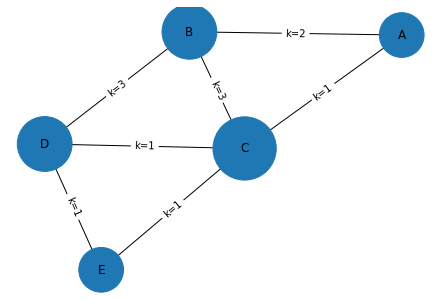


----System Matrix----
[[ 9. -2. -1.  0.  0.]
 [-2. 20. -3. -1.  0.]
 [-1. -3. 18. -1. -1.]
 [ 0. -3. -1. 13. -1.]
 [ 0.  0. -1. -1.  6.]]
Transpose:
[[9.0, -2.0, -1.0, 0.0, 0.0], [-2.0, 20.0, -3.0, -3.0, 0.0], [-1.0, -3.0, 18.0, -1.0, -1.0], [0.0, -1.0, -1.0, 13.0, -1.0], [0.0, 0.0, -1.0, -1.0, 6.0]]
Determinant: 227855.99999999997
Inverse:
[[0.11499368021908572, 0.013087212976616809, 0.008768696018538025, 0.0018169370128502211, 0.0017642721718980408], [0.013025770662172599, 0.05357769819535145, 0.010076539568850502, 0.005090934625377431, 0.0025279123657046556], [0.008891580647426442, 0.010629520398848393, 0.058765185029141215, 0.006170563864897128, 0.010822624815673056], [0.003853310863001192, 0.013490976757250191, 0.007697844252510356, 0.0796731268871568, 0.014561828523277861], [0.002124148585071273, 0.0040200828593497644, 0.011077171546941928, 0.014307281792008988, 0.17089740888982516]]
Eigenvalues: [22.330861099933024, 17.134670774912514, 12.455212747114508, 8.360736956820963, 5.7

In [12]:
# Define 1: Create the graph
G = nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E']) # Add nodes
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('C', 'E'), ('D', 'E')]) # Add edges


# Define 2: the masses of the nodes
m_A = 1
m_B = 2
m_C = 3
m_D = 4
m_E = 0  # Assume that node E is fixed
masses = np.array([m_A, m_B, m_C, m_D, m_E])

# Define 3: nodes names
node_names = ['A', 'B', 'C', 'D', 'E']

# Define 4: the springs values
k_AB = k_BA = 2
k_AC = k_CA = 1
k_BC = k_CB = 3
k_CD = k_DC = 1
k_DE = k_ED = 1
k_BD = k_DB = 1
k_CE = k_EC = 1

springs_values = np.array([    
    [0   , k_BA, k_AC, 0   , 0   ],
    [k_AB, 0   , k_CB, k_DB, 0   ],
    [k_AC, k_BC, 0   , k_DC, k_EC],
    [0   , k_BC, k_DB, 0   , k_ED],
    [0   , 0   , k_CE, k_DE, 0   ]
])


# Define 5: the equilibrium positions of the fixed nodes
x_E = 0

# Define 6: the constant Forces applied on the system (exemple: pestel)
gravity = 9.8


# Define 7: Initial position of the system
initial_positions = pos = nx.spring_layout(G)

# Step 1: Perform Quick Graph analysis
analyze_graph(G)

# Step 2: Get the adjacency matrix
adj_matrix = nx.adjacency_matrix(G).toarray()
print('Adjacency Matrix:\n', adj_matrix)

# Step 3: Get the incidence matrix
inc_matrix = nx.incidence_matrix(G, oriented=True).toarray()
print('Incidence Matrix:\n', inc_matrix)

# Step 4: Show the graph
draw_graph(adj_matrix, node_names, masses, springs_values)


# Step 5: Get the Matrice of the system
A = compute_A(adj_matrix, masses, springs_values)
print("\n----System Matrix----")
print(A)

# Step 6: Perform quick analysis of the matrix
analyze_matrix(A)

# Step 7: Compute the eigenvalues and eigenvectors of A
w, v = np.linalg.eig(A)
print("\n----Eigenvalues----")
print(w)
print("\n----Eigenvectors----")
print(v)

# Step 8: Calculate equilibrium positions
Equilibrium = find_equilibrium(adj_matrix, masses, springs_values, gravity)
print("----Equilibrium----")
print("\nEquilibrium positions:")
for i in range(len(Equilibrium)):
    print("Edge {}: {:.2f}".format(i+1, Equilibrium[i]))


# Step 9: Calculate oscillation frequencies
frequencies = calculate_frequencies(A)
    # Print the frequencies
print("\nOscillation Frequencies:")
for i in range(len(frequencies)):
    print("Edge {}: {:.2f}".format(i+1, frequencies[i]))

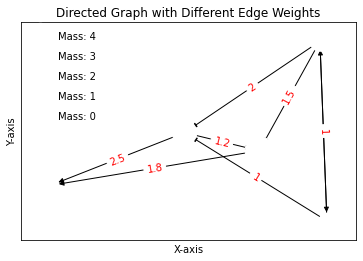

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph with 5 nodes
graph = nx.DiGraph()
graph.add_nodes_from(['A', 'B', 'C', 'D', 'E'])

# Add weighted edges to the graph
graph.add_edge('A', 'B', weight=2)
graph.add_edge('A', 'C', weight=1)
graph.add_edge('B', 'A', weight=1)
graph.add_edge('B', 'C', weight=2)
graph.add_edge('B', 'D', weight=1.5)
graph.add_edge('C', 'D', weight=1.2)
graph.add_edge('C', 'E', weight=2.5)
graph.add_edge('D', 'E', weight=1.8)

# Set the node masses
node_masses = {
    'A': 1,
    'B': 2,
    'C': 3,
    'D': 4,
    'E': 0
}

# Define the layout of the graph
pos = nx.spring_layout(graph)

# Draw the nodes
nx.draw_networkx_nodes(graph, pos, node_color='w', node_size=[mass*200 for mass in node_masses.values()])

# Draw the edges with their weights
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw_networkx_edges(graph, pos, edge_color='k', arrows=True)
nx.draw_networkx_edge_labels(graph, pos, edge_labels, label_pos=0.5, font_color='red')

# Add a legend for the node sizes
for mass in sorted(node_masses.values(), reverse=True):
    plt.scatter([], [], c='w', s=mass*200, label=f"Mass: {mass}")
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='upper left')

# Set the title and axis labels
plt.title("Directed Graph with Different Edge Weights")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()


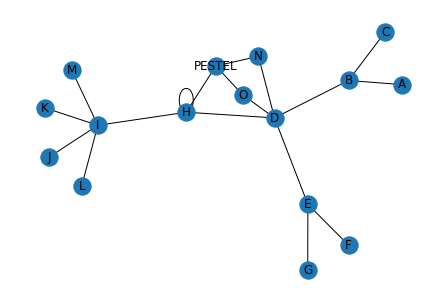

In [111]:
import networkx as nx
import matplotlib.pyplot as plt

# Define 2: the masses of the nodes
m_A = 1
m_B = 2
m_C = 3
m_D = 4
m_E = 0  # Assume that node E is fixed
m_F = 5 
m_G = 5
m_H = 3
m_I = 6 
m_J = 3
m_K = 3
m_L = 3
m_M = 4
m_N = 3
m_O = 2
m_PESTEL = 0

masses = np.array([m_A, m_B, m_C, m_D, m_E,m_F,m_G,m_H,m_I,m_J,m_K,m_L,m_M,m_N,m_O,m_PESTEL])

# Define 4: the springs values
k_AB = 1 
k_BA = 1
k_CB = 1
k_BC = 1
k_BD = 1
k_DB = 1
k_FE = 1
k_EF = 1
k_GE = 1
k_EG = 1
k_ED = 1
k_DE = 1
k_DH = 1
k_HD = 1
k_H  = 1
k_HI = 1
k_IH = 1
k_IK = 1
k_KI = 1
k_IL = 1
k_LI = 1
k_MI = 1
k_IM = 1
k_IJ = 1
k_JI = 1
k_JD = 1
k_DJ = 1
k_DN = 1
k_ND = 1
k_OD = 1
k_DO = 1
f_PESTEL = 8

spring_constants = {
    ('A', 'B', k_AB), 
    ('B', 'A', k_BA),
    ('B', 'C', k_BC),
    ('C', 'B', k_BC),  
    ('B', 'D', k_BD),
    ('D', 'B', k_DB),
    ('F', 'E', k_FE),
    ('E', 'F', k_EF),
    ('G', 'E', k_GE),
    ('E', 'G', k_EG),
    ('B', 'D', k_BD),
    ('D', 'B', k_DB),
    ('E', 'D', k_ED),
    ('D', 'E', k_DE),
    ('D', 'H', k_DH),
    ('H', 'D', k_HD),
    ('H', 'I', k_HI),
    ('I', 'H', k_IH),
    ('I', 'K', k_IK),
    ('K', 'I', k_KI),
    ('I', 'L', k_IL),
    ('L', 'I', k_LI),
    ('I', 'M', k_IM),
    ('M', 'I', k_MI),
    ('I', 'J', k_IJ),
    ('J', 'I', k_JI),
    ('J', 'D', k_JD),
    ('D', 'J', k_DJ),
    ('D', 'N', k_DN),
    ('N', 'S', k_ND),
    ('D', 'O', k_DO),
    ('O', 'D', k_OD),
    ('PESTL', 'N', f_PESTEL),
    ('PESTL', 'O', f_PESTEL),
    ('PESTL', 'H', f_PESTEL)
    
}


# Create an empty graph
G = nx.Graph()

# Set default attributes for nodes and edges
G.graph['name'] = 'My Graph'
G.graph['date_created'] = '2022-02-17'
G.graph['description'] = 'A complete example graph'


# Add nodes with names and values
G.add_node('A', value = m_A )
G.add_node('B', value = m_B )
G.add_node('C', value = m_C )
G.add_node('D', value = m_D )
G.add_node('E', value = m_E )
G.add_node('F', value = m_F )
G.add_node('G', value = m_G )
G.add_node('H', value = m_H )
G.add_node('I', value = m_I )
G.add_node('J', value = m_J )
G.add_node('K', value = m_K )
G.add_node('L', value = m_L )
G.add_node('M', value = m_M )
G.add_node('N', value = m_N )
G.add_node('O', value = m_O )
G.add_node('PESTEL', value = m_PESTEL) #Forces

# Add edges with different values
G.add_edge('A', 'B', value= k_AB )
G.add_edge('B', 'A', value= k_BA )
G.add_edge('C', 'B', value= k_CB )
G.add_edge('B', 'C', value= k_BC )
G.add_edge('B', 'D', value= k_BD )
G.add_edge('D', 'B', value= k_DB )
G.add_edge('F', 'E', value= k_FE )
G.add_edge('E', 'F', value= k_EF )
G.add_edge('G', 'E', value= k_GE )
G.add_edge('E', 'G', value= k_EG )
G.add_edge('E', 'D', value= k_ED )
G.add_edge('D', 'E', value= k_DE )
G.add_edge('D', 'H', value= k_DH )
G.add_edge('H', 'D', value= k_HD )
G.add_edge('H', 'H', value= k_H  )
G.add_edge('H', 'I', value= k_HI )
G.add_edge('I', 'H', value= k_IH )
G.add_edge('I', 'K', value= k_IK )
G.add_edge('K', 'I', value= k_KI )
G.add_edge('I', 'L', value= k_IL )
G.add_edge('L', 'I', value= k_LI )
G.add_edge('M', 'I', value= k_MI )
G.add_edge('I', 'M', value= k_IM )
G.add_edge('I', 'J', value= k_IJ )
G.add_edge('J', 'I', value= k_JI )
G.add_edge('D', 'N', value= k_DN )
G.add_edge('N', 'D', value= k_ND )
G.add_edge('O', 'D', value= k_OD )
G.add_edge('D', 'O', value= k_DO )
G.add_edge('PESTEL', 'N', value= f_PESTEL )
G.add_edge('PESTEL', 'O', value= f_PESTEL )
G.add_edge('PESTEL', 'H', value= f_PESTEL )



# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [120]:
Spring_Matrix, G = calculate_spring_matrix(masses, spring_constants)

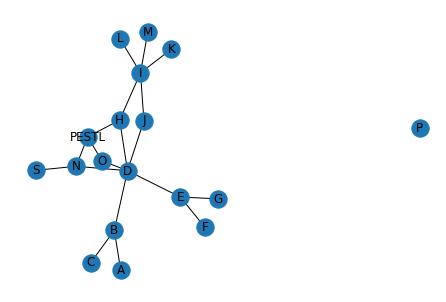

In [121]:
# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [114]:
#masses = [1, 2, 3, 4, 0, 5, 5, 3, 6, 3, 3, 3, 4, 3, 2, 0]
#spring_constants = [('A', 'B', k_AB), ('B', 'C', 4), ('B', 'D', 1), ('C', 'B', 1), ('D', 'B', 1), ('D', 'H', 1), ('D', 'E', 1), ('D', 'N', 1), ('E', 'F', 1), ('E', 'G', 1), ('E', 'D', 1), ('F', 'E', 1), ('G', 'E', 1), ('H', 'D', 1), ('H', 'I', 1), ('H', 'H', 1), ('I', 'H', 1), ('I', 'K', 1), ('I', 'L', 1), ('I', 'M', 1), ('I', 'J', 1), ('J', 'I', 1), ('K', 'I', 1), ('K', 'I', 1), ('L', 'I', 1), ('M', 'I', 1), ('N', 'D', 1), ('O', 'D', 1), ('PESTEL', 'H', 8), ('PESTEL', 'N', 8), ('PESTEL', 'O', 8)]

adj_matrix = calculate_spring_matrix(masses, spring_constants)

print(adj_matrix)


[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 8. 0. 0. 0. 0. 0. 8. 8. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Test

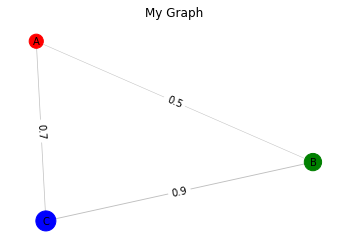

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the graph type (undirected, directed, etc.)
G = nx.Graph()

# Set default attributes for nodes and edges
G.graph['name'] = 'My Graph'
G.graph['date_created'] = '2022-02-17'
G.graph['description'] = 'A complete example graph'

G.node_default = {'color': 'blue', 'size': 10}
G.edge_default = {'weight': 1.0}

# Add nodes with attributes
G.add_node('A', color='red', size=200)
G.add_node('B', color='green', size=300)
G.add_node('C', color='blue', size=400)

# Add edges with attributes
G.add_edge('A', 'B', weight=0.5)
G.add_edge('A', 'C', weight=0.7)
G.add_edge('B', 'C', weight=0.9)

# Define the node colors and sizes
node_colors = [data['color'] for node, data in G.nodes(data=True)]
node_sizes = [data['size'] for node, data in G.nodes(data=True)]

# Define the edge weights
edge_weights = [data['weight'] for u, v, data in G.edges(data=True)]

# Draw the graph with customizations
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): data['weight'] for u, v, data in G.edges(data=True)})
plt.title(G.graph['name'])
plt.axis('off')
plt.show()


In [20]:
import plotly.graph_objects as go

import networkx as nx

G = nx.random_geometric_graph(200, 0.125)

In [21]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [22]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

In [23]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

# New test

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph():
    G = nx.Graph()
    G.add_nodes_from(['M1', 'M2', 'S1', 'S2', 'S3', 'S4', 'S5', 'D1', 'D2', 'D3', 'D4'])
    G.add_edges_from([('M1', 'S1', {'weight': w}), ('M1', 'S2', {'weight': w}), ('M1', 'S3', {'weight': w}), ('M1', 'S4', {'weight': w}), ('M1', 'S5', {'weight': w}), ('M1', 'D1', {'weight': w}), ('M1', 'D2', {'weight': w}), ('M1', 'D3', {'weight': w}), ('M1', 'D4', {'weight': w}), ('M2', 'S1', {'weight': w}), ('M2', 'S2', {'weight': w}), ('M2', 'S3', {'weight': w}), ('M2', 'S4', {'weight': w}), ('M2', 'S5', {'weight': w}), ('M2', 'D1', {'weight': w}), ('M2', 'D2', {'weight': w}), ('M2', 'D3', {'weight': w}), ('M2', 'D4', {'weight': w}), ('S1', 'M1', {'weight': w}), ('S1', 'M2', {'weight': w}), ('S2', 'M1', {'weight': w}), ('S2', 'M2', {'weight': w}), ('S3', 'M1', {'weight': w}), ('S3', 'M2', {'weight': w}), ('S4', 'M1', {'weight': w}), ('S4', 'M2', {'weight': w}), ('S5', 'M1', {'weight': w}), ('S5', 'M2', {'weight': w}), ('D1', 'M1', {'weight': w}), ('D1', 'M2', {'weight': w}), ('D2', 'M1', {'weight': w}), ('D2', 'M2', {'weight': w}), ('D3', 'M1', {'weight': w}), ('D3', 'M2', {'weight': w}), ('D4', 'M1', {'weight': w}), ('D4', 'M2', {'weight': w})])
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1000, font_size=18)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=14)
    plt.show()


In [25]:
import numpy as np

def init_pos():
    positions = np.array([[0, 0], [1, 1], [1, -1], [2, 2], [2, 0], [2, -2], [3, 1], [3, -1], [4, 0], [5, 1], [5, -1]])
    return positions


In [26]:
def superposition_theorem(positions, weights, forces):
    total_force = np.zeros_like(positions)
    for i, (pos_i, weight_i) in enumerate(zip(positions, weights)):
        for j, (pos_j, weight_j) in enumerate(zip(positions, weights)):
            if i == j:
                continue
            r = pos_j - pos_i
            f = forces[i, j] * r / np.linalg.norm(r)
            total_force[i] += f * weight_j
    return total_force


In [27]:
def force_matrix(positions, weights, forces):
    n = positions.shape[0]
    F = np.zeros((n, n))
    for i, (pos_i, weight_i) in enumerate(zip(positions, weights)):
        for j, (pos_j, weight_j) in enumerate(zip(positions, weights)):
            if i == j:
                continue
            r = pos_j - pos_i
            f = forces[i, j] * r / np.linalg.norm(r)
            F[i, j] = np.linalg.norm(f)
    F_simp = F / np.reshape(weights, (n, 1))
    return F_simp


In [28]:
def calc_eig(F_simp):
    eigvals, eigvecs = np.linalg.eig(F_simp)
    return eigvals, eigvecs


In [29]:
def simulate_network(positions, weights, forces, dt, timesteps):
    n = positions.shape[0]
    x = np.reshape(positions, (n * 2,))
    v = np.zeros_like(x)
    k = 1.0  # spring constant
    m = np.reshape(weights, (n * 2,))
    F_simp = force_matrix(positions, weights, forces)
    A = np.diag(1 / m) @ F_simp  # matrix for the second-order differential equation
    for i in range(timesteps):
        # Calculate the force acting on each node
        F = superposition_theorem(np.reshape(x, (n, 2)), weights, forces)
        # Convert the force to acceleration
        a = np.repeat(np.reshape(F, (n * 2, 1)), 2, axis=1).flatten() @ np.diag(1 / m)
        # Update the velocity and position using the Verlet method
        x += v * dt + 0.5 * a * dt ** 2
        v_half = v + 0.5 * a * dt
        F_half = A @ x.reshape((n, 2)).T.flatten()
        a_half = np.repeat(np.reshape(F_half, (n * 2, 1)), 2, axis=1).flatten() @ np.diag(1 / m)
        v = v_half + 0.5 * a_half * dt
    positions = x.reshape((n, 2))
    return positions


In [30]:
def simulate():
    # Define the network
    w = 1.0
    positions = init_pos()
    weights = np.array([10, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5])
    forces = np.array([[0, w, w, w, w, w, w, w, w, w, w],
                       [w, 0, w, w, w, w, w, w, w, w, w],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                       [w, w, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    # Simulate the network
    dt = 0.01
    timesteps = 1000
    positions = simulate_network(positions, weights, forces, dt, timesteps)
    # Analyze the stability of the network
    F_simp = force_matrix(positions, weights, forces)
    eigvals, eigvecs = calc_eig(F_simp)
    # Print the results
    print("Positions:\n", positions)
    print("Eigenvalues:\n", eigvals)
    print("Eigenvectors:\n", eigvecs)


In [31]:
simulate()

ValueError: ignored